### Support Vector Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

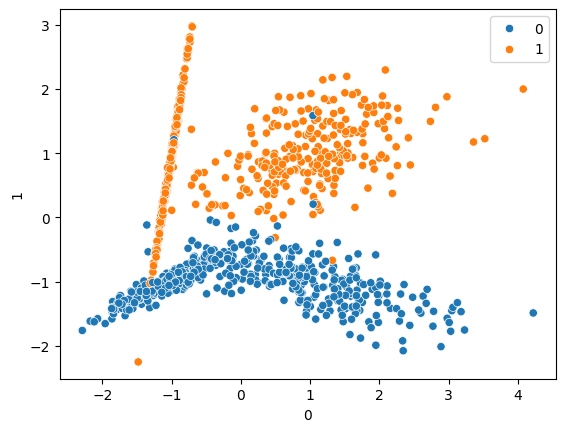

In [3]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y) ### These are seperable

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [5]:
from sklearn.svm import SVC
svc=SVC(kernel='linear') ## Data is seperable
svc.fit(x_train,y_train)


SVC(kernel='linear')

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=svc.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",score)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
report=classification_report(y_test,y_pred)
print(report)

Accuracy Score:  0.976
Confusion Matrix:  [[118   4]
 [  2 126]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       122
           1       0.97      0.98      0.98       128

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [7]:
rbf=SVC(kernel='rbf') ## If Data is not seperable
rbf.fit(x_train,y_train)

SVC()

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=rbf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",score)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
report=classification_report(y_test,y_pred)
print(report)

Accuracy Score:  0.984
Confusion Matrix:  [[119   3]
 [  1 127]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       122
           1       0.98      0.99      0.98       128

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [9]:
poly=SVC(kernel='poly') ## If Data is not seperable
poly.fit(x_train,y_train)

SVC(kernel='poly')

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=poly.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",score)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
report=classification_report(y_test,y_pred)
print(report)

Accuracy Score:  0.952
Confusion Matrix:  [[118   4]
 [  8 120]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       122
           1       0.97      0.94      0.95       128

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [11]:
sigmoid=SVC(kernel='sigmoid') ## If Data is not seperable
sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=sigmoid.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",score)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
report=classification_report(y_test,y_pred)
print(report)

Accuracy Score:  0.908
Confusion Matrix:  [[107  15]
 [  8 120]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       122
           1       0.89      0.94      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



### Hyperparameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV
model=SVC()
params={
    'C':[0.1,0.01,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear','rbf','poly','sigmoid']
}

In [14]:
grid=GridSearchCV(estimator=model,cv=5,param_grid=params,refit=True,verbose=True)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=True)

In [15]:
grid.best_score_

np.float64(0.9800000000000001)

In [16]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=grid.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",score)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
report=classification_report(y_test,y_pred)
print(report)

Accuracy Score:  0.988
Confusion Matrix:  [[120   2]
 [  1 127]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       122
           1       0.98      0.99      0.99       128

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

